Analyzing data leading up to the Volkswagen buyout of Porsche

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sum
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest
from arch import arch_model
import yfinance
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data
raw_data = yfinance.download(tickers='VOW3.DE, PAH3.DE, BMW.DE', interval='1d', group_by='ticker', auto_adjust=True, threads=True)

[*********************100%***********************]  3 of 3 completed


In [3]:
df = raw_data.copy()

In [4]:
# Defining key dates
start_date = '2009-04-05'

# First official announcement - 49.9%
ann_1 = '2009-12-09'

# Second official announcement - 50.1%
ann_2 = '2012-07-05'

# Ending date
end_date = '2014-01-01'

# Dieselgate scandal
d_gate = '2015-09-20'

In [5]:
# Pre-processing the data 

# Extracting closing prices
df['vol'] = df['VOW3.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close

# Creating returns
df['ret_vol'] = df['vol'].pct_change(1).mul(100)
df['ret_por'] = df['por'].pct_change(1).mul(100)
df['ret_bmw'] = df['bmw'].pct_change(1).mul(100)

# Creating squared returns to examine volatility
df['sq_vol'] = df.ret_vol.mul(df.ret_vol)
df['sq_por'] = df.ret_por.mul(df.ret_por)
df['sq_bmw'] = df.ret_bmw.mul(df.ret_bmw)

# Extracting volume
df['q_vol'] = df['VOW3.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume

In [6]:
# Assigning the frequency and filling NA values
df = df.asfreq('b')
df = df.fillna(method='bfill')

In [7]:
# Removing surplus data
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

## Plotting the prices

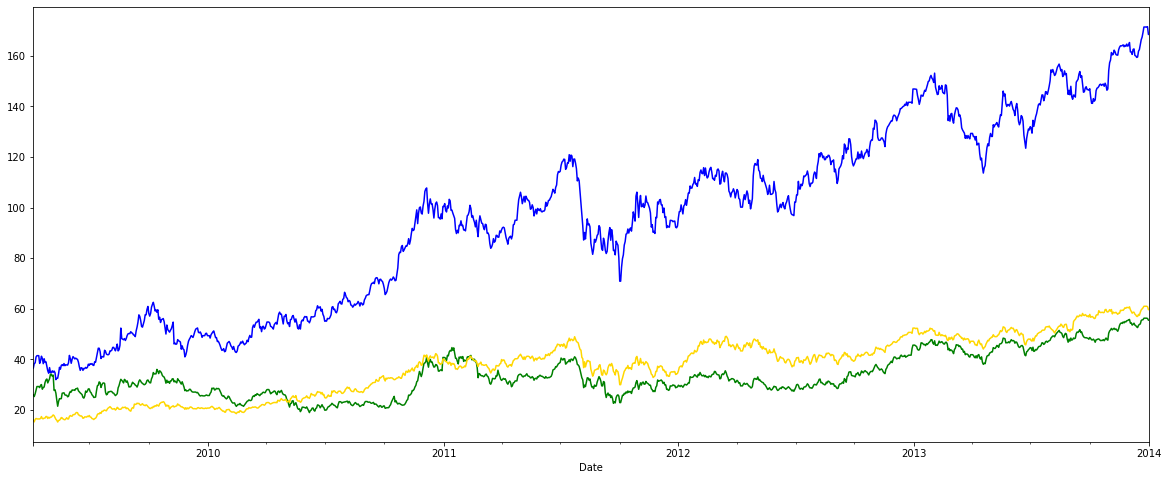

In [8]:
df['vol'][start_date:end_date].plot(figsize=(20,8), color='blue')
df['por'][start_date:end_date].plot(color='green')
df['bmw'][start_date:end_date].plot(color='gold')
plt.show()

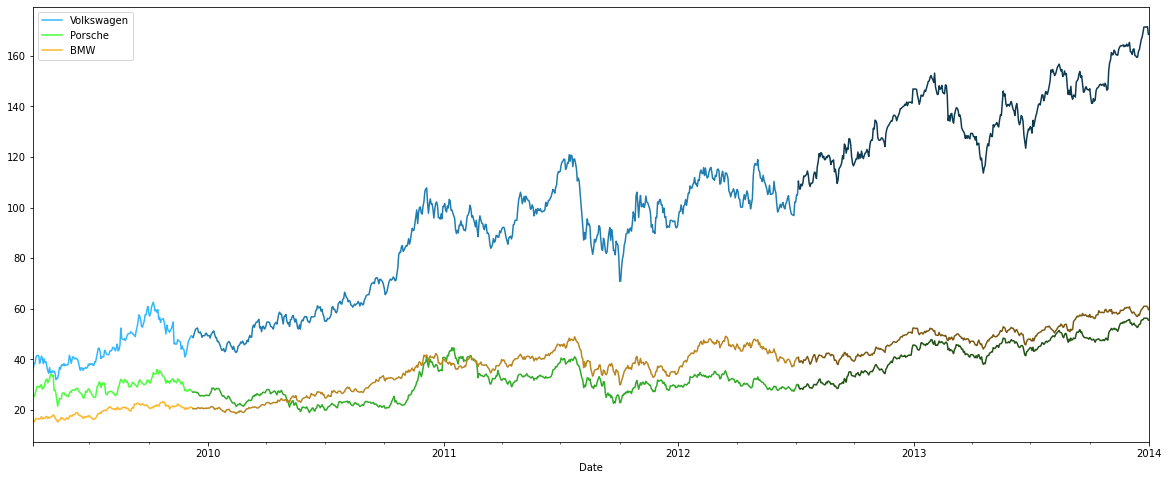

In [10]:
# Plotting periods with different shades
df['vol'][start_date:ann_1].plot(figsize=(20,8), color='#33B8FF')
df['por'][start_date:ann_1].plot(color='#49FF3A')
df['bmw'][start_date:ann_1].plot(color='#FEB628')

df['vol'][ann_1:ann_2].plot(color='#1E7EB2')
df['por'][ann_1:ann_2].plot(color='#2FAB25')
df['bmw'][ann_1:ann_2].plot(color='#BA861F')

df['vol'][ann_2:end_date].plot(color='#0E3A52')
df['por'][ann_2:end_date].plot(color='#225414')
df['bmw'][ann_2:end_date].plot(color='#7C5913')

plt.legend(['Volkswagen', 'Porsche', 'BMW'])

plt.show()


## Correlation

In [13]:
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(end_date) + '\n')
print('Volkswagen and Porsche correlation: \t' + str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))
print('Volkswagen and BMW correlation: \t' + str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))
print('BMW and Porsche correlation: \t\t' + str(df['bmw'][start_date:end_date].corr(df['por'][start_date:end_date])))

Correlation among manufacturers from 2009-04-05 to 2014-01-01

Volkswagen and Porsche correlation: 	0.835954698352621
Volkswagen and BMW correlation: 	0.9799378262494174
BMW and Porsche correlation: 		0.805215772150781


In [14]:
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(ann_1) + '\n')
print('Volkswagen and Porsche correlation: \t' + str(df['vol'][start_date:ann_1].corr(df['por'][start_date:ann_1])))
print('Volkswagen and BMW correlation: \t' + str(df['vol'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))
print('BMW and Porsche correlation: \t\t' + str(df['bmw'][start_date:ann_1].corr(df['por'][start_date:ann_1])))

# the stock prices for Porsche and BMW weren't too similar before the start of the buyout

Correlation among manufacturers from 2009-04-05 to 2009-12-09

Volkswagen and Porsche correlation: 	0.6633584749978142
Volkswagen and BMW correlation: 	0.8427607806171384
BMW and Porsche correlation: 		0.6095039555242728


In [15]:
print('Correlation among manufacturers from ' + str(ann_1) + ' to ' + str(ann_2) + '\n')
print('Volkswagen and Porsche correlation: \t' + str(df['vol'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))
print('Volkswagen and BMW correlation: \t' + str(df['vol'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))
print('BMW and Porsche correlation: \t\t' + str(df['bmw'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))

# increase across all correlations

Correlation among manufacturers from 2009-12-09 to 2012-07-05

Volkswagen and Porsche correlation: 	0.7428267895269604
Volkswagen and BMW correlation: 	0.9795943003486692
BMW and Porsche correlation: 		0.7042723187256684


In [16]:
print('Correlation among manufacturers from ' + str(ann_2) + ' to ' + str(end_date) + '\n')
print('Volkswagen and Porsche correlation: \t' + str(df['vol'][ann_2:end_date].corr(df['por'][ann_2:end_date])))
print('Volkswagen and BMW correlation: \t' + str(df['vol'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))
print('BMW and Porsche correlation: \t\t' + str(df['bmw'][ann_2:end_date].corr(df['por'][ann_2:end_date])))

Correlation among manufacturers from 2012-07-05 to 2014-01-01

Volkswagen and Porsche correlation: 	0.9405237358796883
Volkswagen and BMW correlation: 	0.9284447550016993
BMW and Porsche correlation: 		0.949411168160029


In [17]:
print('Correlation among manufacturers from ' + str(end_date) + ' to ' + str(df.index[-1]) + '\n')
print('Volkswagen and Porsche correlation: \t' + str(df['vol'][end_date:].corr(df['por'][end_date:])))
print('Volkswagen and BMW correlation: \t' + str(df['vol'][end_date:].corr(df['bmw'][end_date:])))
print('BMW and Porsche correlation: \t\t' + str(df['bmw'][end_date:].corr(df['por'][end_date:])))

Correlation among manufacturers from 2014-01-01 to 2021-11-03 00:00:00

Volkswagen and Porsche correlation: 	0.9499180282440248
Volkswagen and BMW correlation: 	0.6953398663235312
BMW and Porsche correlation: 		0.7158150142413922


In [19]:
print('Correlation among manufacturers from ' + str(ann_2) + ' to ' + str(d_gate) + ' before Dieselgate\n')
print('Volkswagen and Porsche correlation: \t' + str(df['vol'][ann_2:d_gate].corr(df['por'][ann_2:d_gate])))
print('Volkswagen and BMW correlation: \t' + str(df['vol'][ann_2:d_gate].corr(df['bmw'][ann_2:d_gate])))
print('BMW and Porsche correlation: \t\t' + str(df['bmw'][ann_2:d_gate].corr(df['por'][ann_2:d_gate])))

Correlation among manufacturers from 2012-07-05 to 2015-09-20 before Dieselgate

Volkswagen and Porsche correlation: 	0.9436366638666571
Volkswagen and BMW correlation: 	0.9243641542195119
BMW and Porsche correlation: 		0.9282180571507428


In [20]:
print('Correlation among manufacturers from ' + str(d_gate) + ' to ' + str(df.index[-1]) + ' after Dieselgate\n')
print('Volkswagen and Porsche correlation: \t' + str(df['vol'][d_gate:].corr(df['por'][ann_2:])))
print('Volkswagen and BMW correlation: \t' + str(df['vol'][d_gate:].corr(df['bmw'][ann_2:])))
print('BMW and Porsche correlation: \t\t' + str(df['bmw'][d_gate:].corr(df['por'][ann_2:])))

Correlation among manufacturers from 2015-09-20 to 2021-11-03 00:00:00 after Dieselgate

Volkswagen and Porsche correlation: 	0.9793287384579629
Volkswagen and BMW correlation: 	0.6860067949487255
BMW and Porsche correlation: 		0.7221800369441927


## Best fitting models

### For Volkswagen

In [26]:
mod_pr_pre_vol = auto_arima(df.vol[start_date:ann_1], exogenous=df[['por', 'bmw']][start_date:ann_1], m=5, max_p=5, max_q=5)
mod_pr_btn_vol = auto_arima(df.vol[ann_1:ann_2], exogenous=df[['por', 'bmw']][ann_1:ann_2], m=5, max_p=5, max_q=5)
mod_pr_post_vol = auto_arima(df.vol[ann_2:end_date], exogenous=df[['por', 'bmw']][ann_2:end_date], m=5, max_p=5, max_q=5)

In [23]:
mod_pr_pre_vol.summary()
# AR(1) with two exog variables seems to be the best fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -322.988
Date:                Wed, 03 Nov 2021   AIC                            655.976
Time:                        21:54:01   BIC                            671.885
Sample:                    04-06-2009   HQIC                           662.428
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7233      0.447      1.618      0.106      -0.153       1.599
por            0.4000      0.096      4.168      0.000       0.212       0.588
bmw            0.6919      0.328      2.107      0.035       0.048       1.335
ar.L1          0.9633      0.020     48.669      0.000       0.925       1.002
sigma2         2.1737      0.148     14.718      0.000       1.884       2.463
===================================================================================
Ljung-Box (Q):                       38.24   Jarque-Bera (JB):               166.02
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -0.52
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
mod_pr_btn_vol.summary()
# ARIMAX (0,1,0) with two exog variables
# the optimal model is an integrated one
# the model finds past residuals to have significant explanatory power

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1080.051
Date:                Wed, 03 Nov 2021   AIC                           2166.102
Time:                        21:57:02   BIC                           2179.628
Sample:                    12-09-2009   HQIC                          2171.341
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            0.7908      0.062     12.842      0.000       0.670       0.912
bmw            1.5487      0.073     21.269      0.000       1.406       1.691
sigma2         1.4643      0.060     24.532      0.000       1.347       1.581
===================================================================================
Ljung-Box (Q):                       33.75   Jarque-Bera (JB):               112.41
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
mod_pr_post_vol.summary()
# ARIMAX(0,1,0) with two exog variables
# the price of Porsche today will be a more accurate estimator than the price of VW yesterday
# new information seems to have a higher impact on trends compared to past patterns

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  390
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -607.774
Date:                Wed, 03 Nov 2021   AIC                           1221.548
Time:                        21:57:06   BIC                           1233.439
Sample:                    07-05-2012   HQIC                          1226.262
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            1.7190      0.057     30.370      0.000       1.608       1.830
bmw            0.8575      0.091      9.381      0.000       0.678       1.037
sigma2         1.3323      0.065     20.462      0.000       1.205       1.460
===================================================================================
Ljung-Box (Q):                       28.08   Jarque-Bera (JB):               103.80
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.39
Prob(H) (two-sided):                  0.15   Kurtosis:                         5.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### For Porsche

In [29]:
mod_pr_pre_por = auto_arima(df.por[start_date:ann_1], exogenous=df[['vol', 'bmw']][start_date:ann_1], m=5, max_p=5, max_q=5)
mod_pr_btn_por = auto_arima(df.por[ann_1:ann_2], exogenous=df[['vol', 'bmw']][ann_1:ann_2], m=5, max_p=5, max_q=5)
mod_pr_post_por = auto_arima(df.por[ann_2:end_date], exogenous=df[['vol', 'bmw']][ann_2:end_date], m=5, max_p=5, max_q=5)

In [30]:
mod_pr_pre_por.summary()
# AR(2) model with two exog variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -225.800
Date:                Wed, 03 Nov 2021   AIC                            463.601
Time:                        22:00:01   BIC                            482.692
Sample:                    04-06-2009   HQIC                           471.343
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5756      0.375      1.533      0.125      -0.160       1.312
vol            0.1150      0.053      2.157      0.031       0.011       0.219
bmw            0.8819      0.159      5.558      0.000       0.571       1.193
ar.L1          1.0747      0.059     18.194      0.000       0.959       1.191
ar.L2         -0.1589      0.059     -2.716      0.007      -0.274      -0.044
sigma2         0.7319      0.052     14.098      0.000       0.630       0.834
===================================================================================
Ljung-Box (Q):                       26.01   Jarque-Bera (JB):               559.36
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
mod_pr_btn_por.summary()
# shift towards an integrated model ARIMA(1,1,1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -580.933
Date:                Wed, 03 Nov 2021   AIC                           1171.866
Time:                        22:00:34   BIC                           1194.410
Sample:                    12-09-2009   HQIC                          1180.598
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vol            0.1785      0.016     11.134      0.000       0.147       0.210
bmw            0.3317      0.046      7.200      0.000       0.241       0.422
ar.L1          0.6580      0.230      2.855      0.004       0.206       1.110
ma.L1         -0.5893      0.247     -2.390      0.017      -1.073      -0.106
sigma2         0.3308      0.010     32.415      0.000       0.311       0.351
===================================================================================
Ljung-Box (Q):                       33.43   Jarque-Bera (JB):              1076.51
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
mod_pr_post_por.summary()
# model discovers a seasonal pattern SARIMAX(0,1,0)(0,0,1,5)
# these trends are affected more by current events rather than pre-existing patterns

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  390
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 5)   Log Likelihood                -210.239
Date:                             Wed, 03 Nov 2021   AIC                            428.478
Time:                                     22:01:29   BIC                            444.332
Sample:                                 07-05-2012   HQIC                           434.763
                                      - 01-01-2014                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vol            0.2219      0.013     16.876      0.000       0.196       0.248
bmw            0.2504      0.041      6.036      0.000       0.169       0.332
ma.S.L5       -0.1249      0.057     -2.210      0.027      -0.236      -0.014
sigma2         0.1725      0.006     27.851      0.000       0.160       0.185
===================================================================================
Ljung-Box (Q):                       34.49   Jarque-Bera (JB):               613.61
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions for the Future

### For Porsche

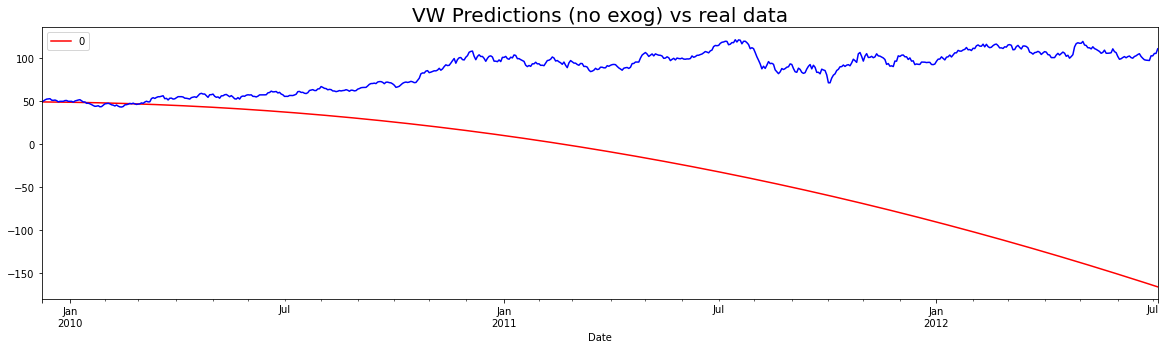

In [34]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend='ct')

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[ann_1:ann_2])), index=df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize=(20,5), color='red')

df.vol[ann_1:ann_2].plot(color='blue')
plt.title('VW Predictions (no exog) vs real data', size=20)
plt.show()


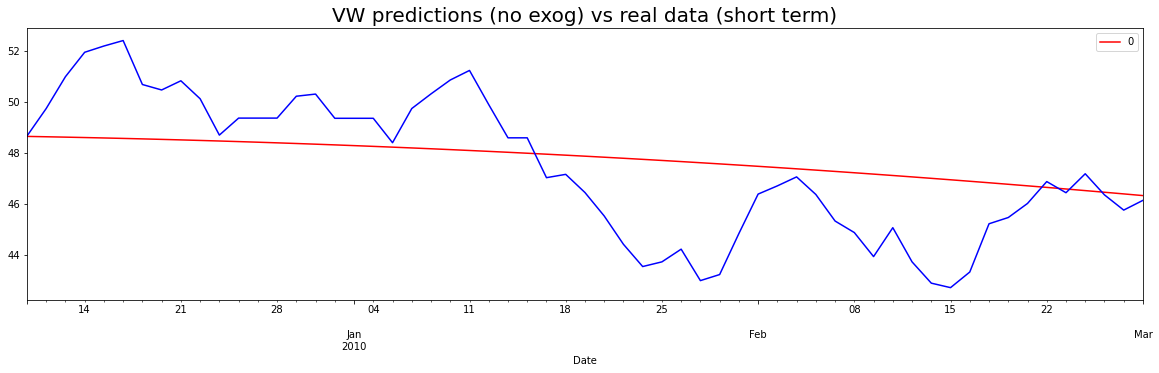

In [35]:
df_auto_pred_pr[ann_1:'2010-03-01'].plot(figsize=(20,5), color='red')
df.vol[ann_1:'2010-03-01'].plot(color='blue')
plt.title('VW predictions (no exog) vs real data (short term)', size=20)
plt.show()

### For Volkswagen

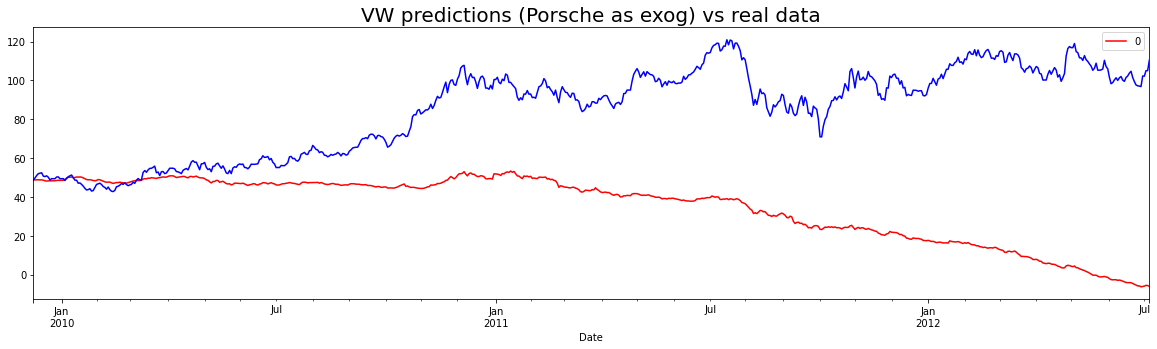

In [36]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous=df[['por']][start_date:ann_1], m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend='ct')

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[ann_1:ann_2]), exogenous=df[['por']][ann_1:ann_2]), index=df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize=(20,5), color='red')
df.vol[ann_1:ann_2].plot(color='blue')
plt.title('VW predictions (Porsche as exog) vs real data', size=20)
plt.show()

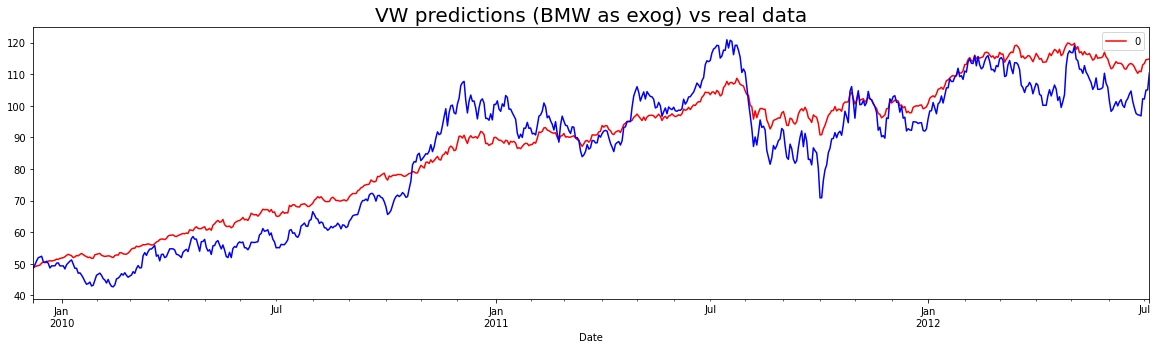

In [37]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous=df[['bmw']][start_date:ann_1], m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend='ct')

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[ann_1:ann_2]), exogenous=df[['bmw']][ann_1:ann_2]), index=df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize=(20,5), color='red')
df.vol[ann_1:ann_2].plot(color='blue')
plt.title('VW predictions (BMW as exog) vs real data', size=20)
plt.show()

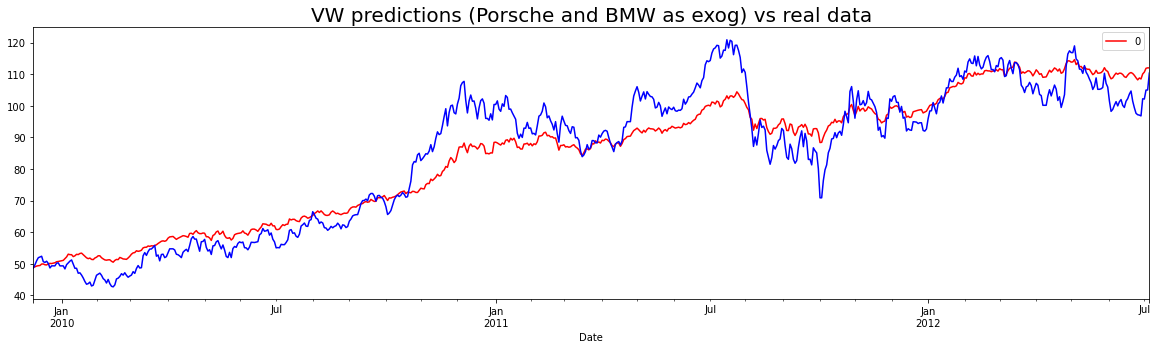

In [38]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous=df[['por','bmw']][start_date:ann_1], m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend='ct')

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[ann_1:ann_2]), exogenous=df[['por','bmw']][ann_1:ann_2]), index=df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize=(20,5), color='red')
df.vol[ann_1:ann_2].plot(color='blue')
plt.title('VW predictions (Porsche and BMW as exog) vs real data', size=20)
plt.show()

# this model adjusts to big jumps and drops faster, and matches the smaller shifts better
# MAX models are less affected by real-life events

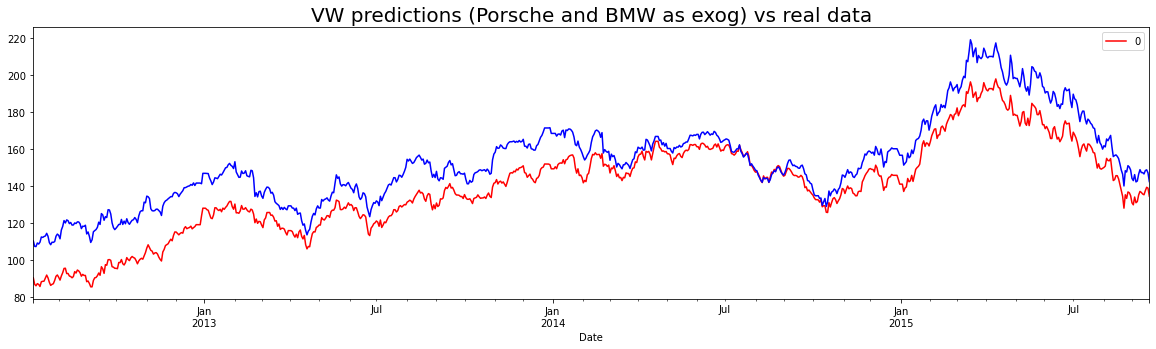

In [39]:
# Check before dieselgate
model_auto_pred_pr = auto_arima(df.vol[ann_2:d_gate], exogenous=df[['por','bmw']][ann_2:d_gate], m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend='ct')

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[ann_2:d_gate]), exogenous=df[['por','bmw']][ann_2:d_gate]), index=df[ann_2:d_gate].index)
df_auto_pred_pr[ann_2:d_gate].plot(figsize=(20,5), color='red')
df.vol[ann_2:d_gate].plot(color='blue')
plt.title('VW predictions (Porsche and BMW as exog) vs real data', size=20)
plt.show()



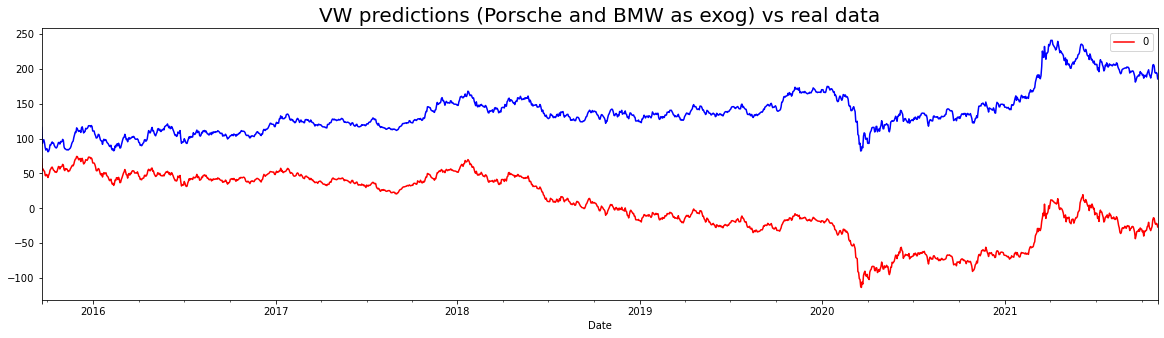

In [40]:
# Check after dieselgate
model_auto_pred_pr = auto_arima(df.vol[d_gate:], exogenous=df[['por','bmw']][d_gate:], m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend='ct')

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[d_gate:]), exogenous=df[['por','bmw']][d_gate:]), index=df[d_gate:].index)
df_auto_pred_pr[d_gate:].plot(figsize=(20,5), color='red')
df.vol[d_gate:].plot(color='blue')
plt.title('VW predictions (Porsche and BMW as exog) vs real data', size=20)
plt.show()



## Volatility

### Volatility of VW for each period

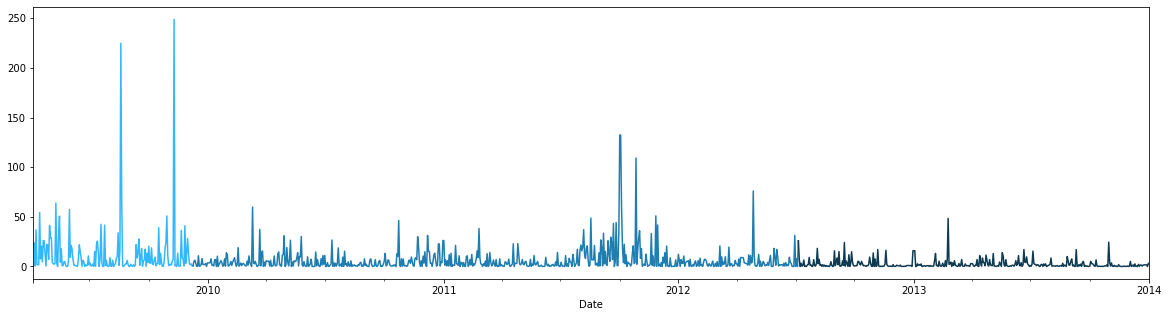

In [41]:
df['sq_vol'][start_date:ann_1].plot(figsize=(20,5), color='#33b8ff')
df['sq_vol'][ann_1:ann_2].plot(color='#1e7eb2')
df['sq_vol'][ann_2:end_date].plot(color='#0e3a52')
plt.show()

### Volatility trends for each period

In [42]:
model_garch_pre = arch_model(df.ret_vol[start_date:ann_1], mean='Constant', vol='GARCH', p=1, q=1)
results_garch_pre = model_garch_pre.fit(update_freq=5)

model_garch_btn = arch_model(df.ret_vol[ann_1:ann_2], mean='Constant', vol='GARCH', p=1, q=1)
results_garch_btn = model_garch_btn.fit(update_freq=5)

model_garch_post = arch_model(df.ret_vol[ann_2:end_date], mean='Constant', vol='GARCH', p=1, q=1)
results_garch_post = model_garch_post.fit(update_freq=5)

Iteration:      5,   Func. Count:     31,   Neg. LLF: 475.77759647770404
Iteration:     10,   Func. Count:     56,   Neg. LLF: 475.0032013028643
Iteration:     15,   Func. Count:     80,   Neg. LLF: 474.99054563419907
Optimization terminated successfully    (Exit mode 0)
            Current function value: 474.99054558190596
            Iterations: 15
            Function evaluations: 80
            Gradient evaluations: 15
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1526.753422573086
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1526.7314915112022
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1526.731491509957
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      5,   Func. Count:     34,   Neg. LLF: 724.5624352275174
Optimization terminated successfully    (Exit mode 0)
            Current function value: 724.5580766319724
            Iterations: 7
            

In [43]:
results_garch_pre.summary()
# p-value for beta is 1, which means trends in variance aren't as persistent as we would expect
# because of the GARCH isn't necessary and ARCH model would be a better fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -474.991
Distribution:                  Normal   AIC:                           957.981
Method:            Maximum Likelihood   BIC:                           970.708
                                        No. Observations:                  178
Date:                Wed, Nov 03 2021   Df Residuals:                      177
Time:                        22:23:56   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1570      0.266      0.589      0.556 [ -0.365,  0.679]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         10.6196      4.227      2.512  1.200e-02    [  2.334, 18.905]
alpha[1]       0.1540  9.195e-02      1.675  9.400e-02 [-2.623e-02,  0.334]
beta[1]    1.0999e-12      0.349  3.150e-12      1.000    [ -0.684,  0.684]
===========================================================================

Covariance estimator: robust
"""

In [44]:
results_garch_btn.summary()
# p-value for beta is opposite than before, which means auto correlation in the conditional variance is significant and hardly dies off 
# We never expect returns or their volatility to ever be perfectly stable

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1526.73
Distribution:                  Normal   AIC:                           3061.46
Method:            Maximum Likelihood   BIC:                           3079.50
                                        No. Observations:                  672
Date:                Wed, Nov 03 2021   Df Residuals:                      671
Time:                        22:23:56   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1892  8.634e-02      2.191  2.843e-02 [1.998e-02,  0.358]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1679  7.914e-02      2.122  3.388e-02 [1.279e-02,  0.323]
alpha[1]       0.0688  1.682e-02      4.091  4.301e-05 [3.585e-02,  0.102]
beta[1]        0.9040  2.108e-02     42.883      0.000   [  0.863,  0.945]
==========================================================================

Covariance estimator: robust
"""

In [45]:
results_garch_post.summary()
# non-significants coefficients for the constant omega and alpha1
# this implies there is some auto correlation in volatility

# we see really different volatility trends in all 3 periods

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -724.558
Distribution:                  Normal   AIC:                           1457.12
Method:            Maximum Likelihood   BIC:                           1472.98
                                        No. Observations:                  390
Date:                Wed, Nov 03 2021   Df Residuals:                      389
Time:                        22:23:56   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2298  9.845e-02      2.334  1.958e-02 [3.685e-02,  0.423]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.7719      0.677      1.141      0.254    [ -0.555,  2.098]
alpha[1]       0.1853      0.145      1.273      0.203 [-9.991e-02,  0.470]
beta[1]        0.5136      0.331      1.550      0.121    [ -0.136,  1.163]
===========================================================================

Covariance estimator: robust
"""

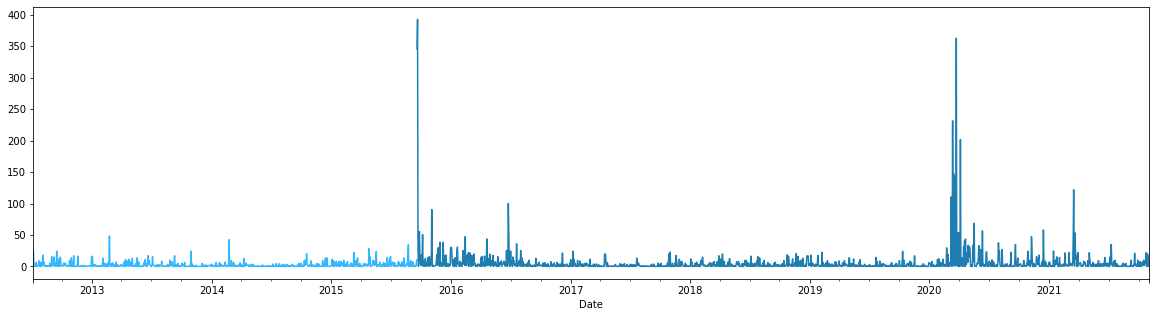

In [46]:
# dieselgate

df['sq_vol'][ann_2:d_gate].plot(figsize=(20,5), color='#33b8ff')
df['sq_vol'][d_gate:].plot(color='#1e7eb2')
plt.show()